In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn, sklearn.datasets
from sklearn.model_selection import train_test_split

## Classification with Logistic Regression

In [33]:
# Load in data and make validation set
data = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], test_size=0.33, random_state=42
)
N, D = X_train.shape

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Creat logistic regression using a sequential model.
model = tf.keras.Sequential([
    tf.keras.layers.Input(D,),
    tf.keras.layers.Dense(1, activation='sigmoid', name='out')
])

# complie the model with the adam optimizer, binary_crossentropy loss and accuracy as the metric
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# fit the model with 100 epochs
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100
)


Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7099 - accuracy: 0.5407 - val_loss: 0.6559 - val_accuracy: 0.5851
Epoch 2/100
12/12 [==============================] - 0s 17ms/step - loss: 0.6339 - accuracy: 0.6352 - val_loss: 0.5833 - val_accuracy: 0.7340
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5666 - accuracy: 0.7428 - val_loss: 0.5236 - val_accuracy: 0.8511
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.8189 - val_loss: 0.4737 - val_accuracy: 0.8883
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4660 - accuracy: 0.8688 - val_loss: 0.4332 - val_accuracy: 0.8883
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4290 - accuracy: 0.9055 - val_loss: 0.3995 - val_accuracy: 0.9202
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3956 - accuracy: 0.9108 - val_loss: 0.3727 - val_accuracy: 0.9415
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9738 - val_loss: 0.1137 - val_accuracy: 0.9681
Epoch 60/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1240 - accuracy: 0.9738 - val_loss: 0.1126 - val_accuracy: 0.9681
Epoch 61/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1230 - accuracy: 0.9764 - val_loss: 0.1115 - val_accuracy: 0.9681
Epoch 62/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1220 - accuracy: 0.9764 - val_loss: 0.1104 - val_accuracy: 0.9681
Epoch 63/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1211 - accuracy: 0.9764 - val_loss: 0.1093 - val_accuracy: 0.9681
Epoch 64/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1202 - accuracy: 0.9764 - val_loss: 0.1084 - val_accuracy: 0.9681
Epoch 65/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9764 - val_loss: 0.1074 - val_accuracy: 0.9681
Epoch 

In [40]:
# evaluate the loss and accuracy for train and test sets
print("Train score", model.evaluate(X_train, y_train))
print("Test score", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9843
Train score [0.09801628440618515, 0.9842519760131836]
6/6 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9840
Test score [0.08393514901399612, 0.9840425252914429]


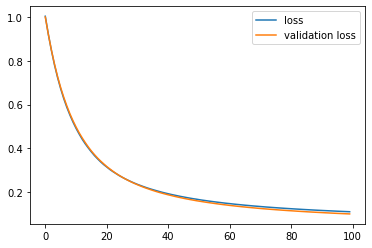

In [38]:
#plot the loss with epochs in the x-axis
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

## Linear Regression

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv')

In [22]:
# Tensorflow likes N x D arrays
X = data.values[:,0].reshape(-1, 1) # Now an N x D array, D = 1
Y = data.values[:,1]

In [23]:
Y = np.log(Y)

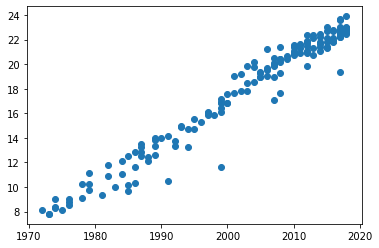

In [24]:
plt.scatter(X, Y);

In [25]:
X = X - X.mean()

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

# Learning rate scheduler
def schedule(epoch, learning_rate):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 488.3988 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 654.5054 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 585.9905 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 349.4143 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 191.7277 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 130.0455 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 99.2481 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 116.9513 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 66.9992 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 46.2119 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 

6/6 [==============================] - 0s 2ms/step - loss: 0.8734 - lr: 1.0000e-04
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8734 - lr: 1.0000e-04
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8738 - lr: 1.0000e-04
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9723 - lr: 1.0000e-04
Epoch 176/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0415 - lr: 1.0000e-04
Epoch 177/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8753 - lr: 1.0000e-04
Epoch 178/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8982 - lr: 1.0000e-04
Epoch 179/200
6/6 [==============================] - 0s 1ms/step - loss: 0.9145 - lr: 1.0000e-04
Epoch 180/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8790 - lr: 1.0000e-04
Epoch 181/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8817 - lr: 1.0000e-04
Epoch 182/200
6/6 [=========================

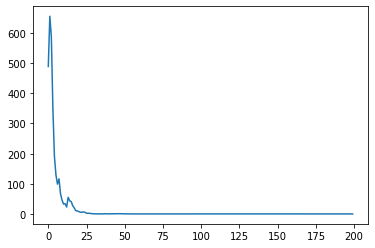

In [28]:
plt.plot(r.history['loss'])

In [29]:
print(model.layers)

In [30]:
print(model.layers[0].get_weights())

[array([[0.34524462]], dtype=float32), array([17.827255], dtype=float32)]


In [31]:
a = model.layers[0].get_weights()[0][0,0]

In [32]:
a

0.34524462

In [33]:
#C = A_0r^t === logC = logr*t+log a_0